In [152]:
# from sklearn import svm,metrics
# from sklearn.neighbors import KNeighborsClassifier # 븐류
# from sklearn.neighbors import KNeighborsRegressor # 회귀- 예측
from sklearn.linear_model import LinearRegression # 선형회귀
from sklearn.preprocessing import PolynomialFeatures # 다항특성을 만들어주는 라이브러리
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib
import glob, os.path, re
from collections import Counter
from konlpy.tag import Okt
from konlpy.tag import Kkma
import operator
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from tensorflow import keras

matplotlib.rcParams['axes.unicode_minus'] = False  # 마이너스 표시 해결
# 한글설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # windows 사용자
# matplotlib.rcParams['font.family'] = 'AppleGothic Gothic

In [153]:
model = keras.models.load_model('cnn_model.keras')

In [154]:
# 0번째 input 
model.layers[0].input

<KerasTensor shape=(None, 28, 28, 1), dtype=float32, sparse=False, name=input_layer_2>

In [155]:
# 0번째 output
model.layers[0].output

<KerasTensor shape=(None, 28, 28, 32), dtype=float32, sparse=False, name=keras_tensor_448>

In [156]:
# keras.models.Model 넣어서 결과 보기
# 모델을 새롭게 구성
conv_acti = keras.models.Model(model.layers[0].input, model.layers[0].output)

In [157]:
# 데이터를 1개 뽑아서, 위 model에 넣어서 확인

In [158]:
(train_input, train_target),(test_input, test_target) = keras.datasets.fashion_mnist.load_data()

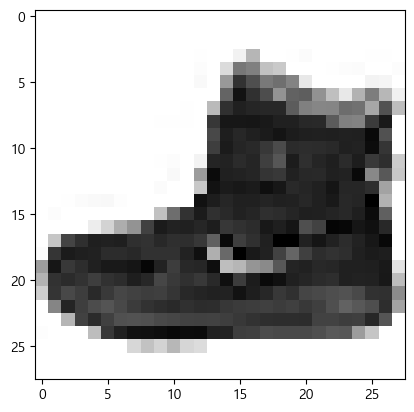

In [159]:
# train_input[0] 데이터를 확인
plt.imshow(train_input[0],cmap='gray_r')
plt.show()

In [160]:
# train_input[0] 데이터를 위 model을 가지고 예측
# 2차원 행렬 -> 3차원 행렬로 변경 /255 
inputs = train_input[0:1].reshape(-1,28,28,1)/255

# 1개를 예측 임시 model(conv_acti)에서 predict
feature_maps = conv_acti(inputs) # conv2D모델만 존재

In [161]:
# 32개 필터의 활성화 맵이 구성됨.
print(feature_maps.shape)

(1, 28, 28, 32)


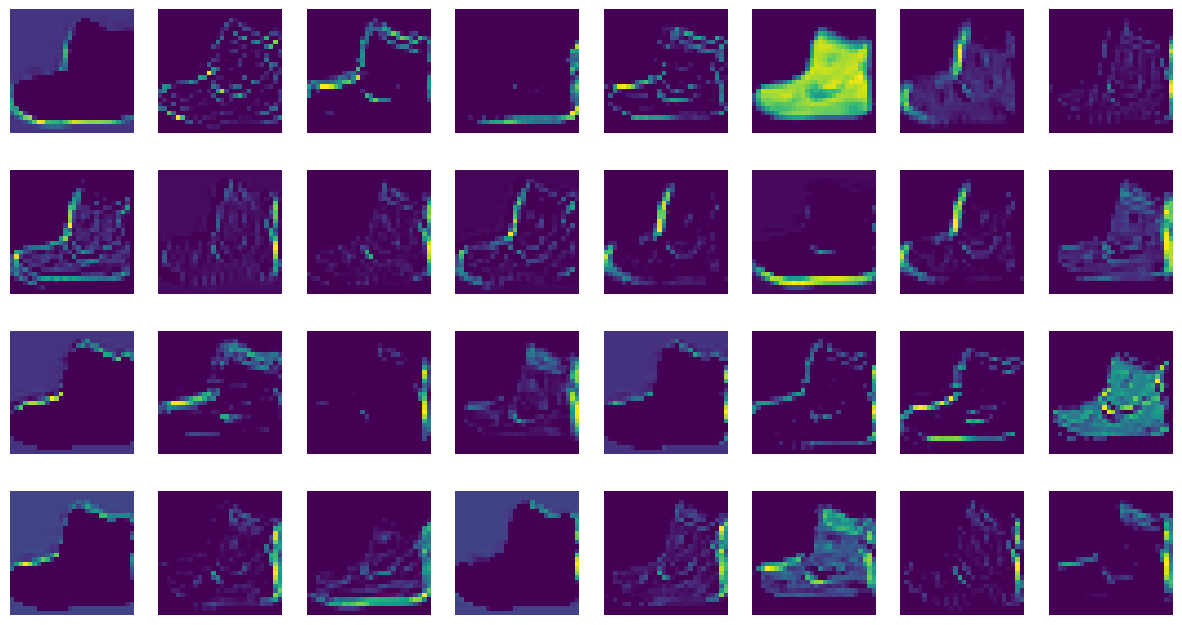

In [162]:
# 그래프 출력 -활성화맵(가중치 결과) 32장의 이미지 출력
fig,axs = plt.subplots(4,8,figsize=(15,8))
for i in range(4):
     for j in range(8):
          # [0,0],[0,1],[0,2],...,[1,7]
          axs[i,j].imshow(feature_maps[0,:,:,i*8+j]) # 0 ~ 31
          axs[i,j].axis('off')
plt.show()